Alumno: Erick Salvador Alvarez Valencia

## Operaciones aritméticas

### Operaciones entre dos imágenes

Aquí se aplicar las operaciones: suma, resta, multiplicación y división entre dos imágenes con mismas dimensiones, para ello se usarán imágenes contenidas en la librería de scikit, una de ellas se redimensionará. De la misma forma se cuidará la división por cero y se aplicará una función de reescalamiento para que los valores no se salgan del rango.

In [1]:
import numpy as np
import skimage
from skimage import data
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def normalize(img):
    img = (img - img.min()) / (img.max() - img.min()) * 255.0
    return np.array(img, dtype = 'uint8')
    
%matplotlib inline

In [2]:
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage import img_as_float
cat = data.chelsea()
coins = data.coins()

Se redimensiona la imagen para poder hacer las operaciones puntuales.

In [3]:
coins = resize(coins, cat.shape, mode='reflect')
print(cat.shape, coins.shape)

(300, 451, 3) (300, 451, 3)


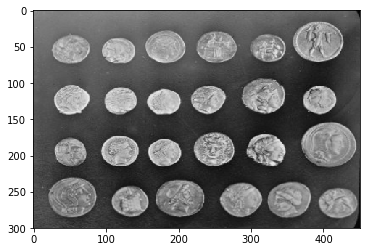

In [4]:
plt.imshow(coins)

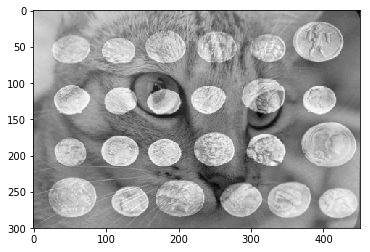

In [5]:
cat = rgb2gray(cat)
coins = rgb2gray(coins)

cat = np.array(cat, dtype = 'float')
coins = np.array(coins, dtype = 'float')

img_sum = np.zeros(cat.shape, dtype = 'float')
img_subs1 = np.zeros(cat.shape, dtype = 'float')
img_subs2 = np.zeros(cat.shape, dtype = 'float')
img_mul = np.zeros(cat.shape, dtype = 'float')
img_div1 = np.zeros(cat.shape, dtype = 'float')
img_div2 = np.zeros(cat.shape, dtype = 'float')

for i in range(cat.shape[0]):
    for j in range(cat.shape[1]):
        img_sum[i, j] = cat[i, j] + coins[i, j]
        img_subs1[i, j] = cat[i, j] - coins[i, j]
        img_subs2[i, j] = coins[i, j] + cat[i, j]
        img_mul[i, j] = cat[i, j] * coins[i, j]
        if coins[i, j] == 0.0:
            img_div1[i, j] = 0.0
        else:
            img_div1[i, j] = cat[i, j] / coins[i, j]
        if cat[i, j] == 0.0:
            img_div2[i, j] = 0.0
        else:
            img_div2[i, j] = coins[i, j] / cat[i, j]

#Se realizan las operaciones de suma, resta, multiplicación y división
img_sum = normalize(img_sum)
img_subs1 = normalize(img_subs1)
img_subs2 = normalize(img_subs2)
img_mul = normalize(img_mul)
img_div1 = normalize(img_div1)
img_div2 = normalize(img_div2)

plt.imshow(img_sum, cmap = cm.Greys_r)

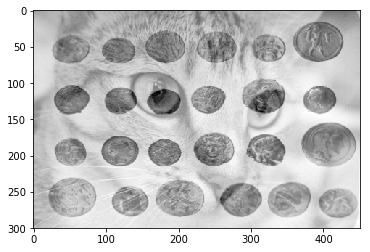

In [6]:
plt.imshow(img_subs1, cmap = cm.Greys_r)

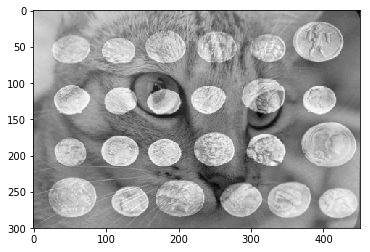

In [7]:
plt.imshow(img_subs2, cmap = cm.Greys_r)

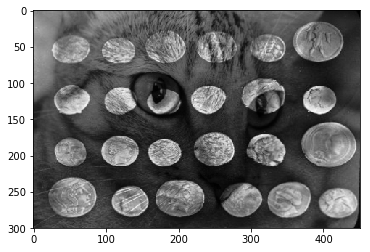

In [8]:
plt.imshow(img_mul, cmap = cm.Greys_r)

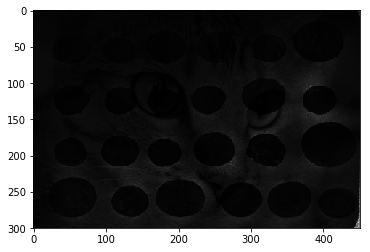

In [9]:
plt.imshow(img_div1, cmap = cm.Greys_r)

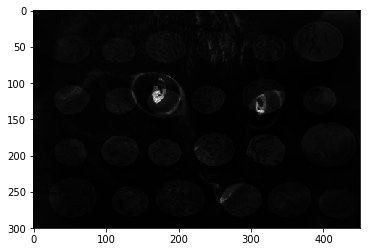

In [10]:
plt.imshow(img_div2, cmap = cm.Greys_r)

### Operaciones con escalares

En esta parte se aplicarán funciones puntuales entre imágenes y escalares, se tomarán en consideración las mismas características mencionadas en la sección anterior.

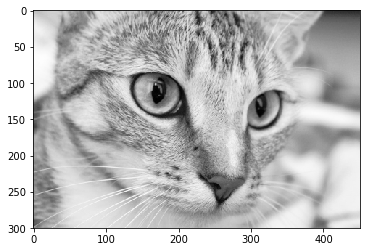

In [14]:
c = 0.7
s_sum = np.zeros(cat.shape, dtype = 'float')
s_subs = np.zeros(cat.shape, dtype = 'float')
s_mul = np.zeros(cat.shape, dtype = 'float')
s_div = np.zeros(cat.shape, dtype = 'float')

s_sum = cat + c
s_subs = cat - c
s_mul = cat * c
s_div = cat / c

s_sum = normalize(s_sum)
s_subs = normalize(s_subs)
s_mul = normalize(s_mul)
s_div = normalize(s_div)

plt.imshow(s_sum, cmap = cm.Greys_r)

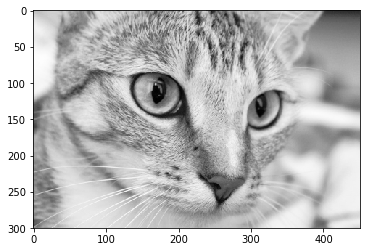

In [15]:
plt.imshow(s_subs, cmap = cm.Greys_r)

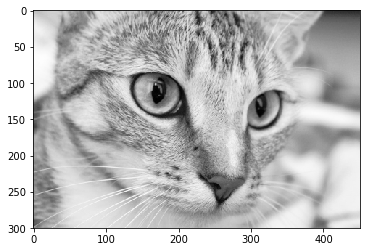

In [16]:
plt.imshow(s_mul, cmap = cm.Greys_r)

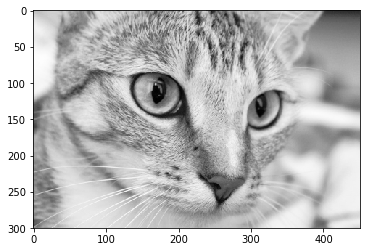

In [17]:
plt.imshow(s_div, cmap = cm.Greys_r)

## Operadores diferenciales

Para esta parte se aplicarán los métodos de diferencias finitas en las componentes $X$, $Y$ y diagonales usando una imagen en escala de grises.

0.0002827450980392157 1.0


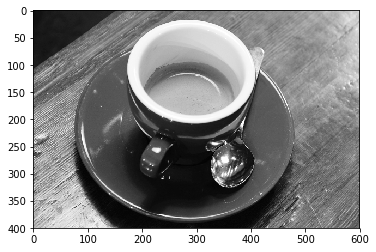

In [18]:
from skimage import img_as_ubyte
import math

def normalize_f(img):
    img = (img - img.min()) / (img.max() - img.min())
    return img

coffee = rgb2gray(data.coffee())
img_fdf_x = np.zeros(coffee.shape, dtype = 'float')
img_fdb_x = np.zeros(coffee.shape, dtype = 'float')
img_fdc_x = np.zeros(coffee.shape, dtype = 'float')

img_fdf_y = np.zeros(coffee.shape, dtype = 'float')
img_fdb_y = np.zeros(coffee.shape, dtype = 'float')
img_fdc_y = np.zeros(coffee.shape, dtype = 'float')

print(coffee.min(), coffee.max())
plt.imshow(coffee, cmap = cm.Greys_r)

### Diferencias hacia adelante, atrás y centrales en X

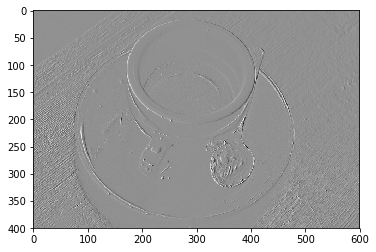

In [19]:
for i in range(coffee.shape[0]):
    for j in range(coffee.shape[1] - 1):
        img_fdf_x[i, j] = coffee[i, j + 1] - coffee[i, j]
        
img_fdf_x = normalize_f(img_fdf_x)
plt.imshow(img_fdf_x, cmap = cm.Greys_r)

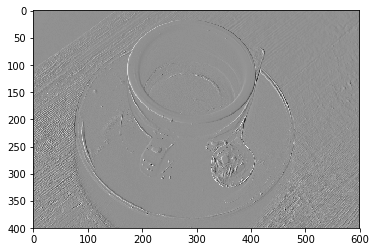

In [20]:
for i in range(coffee.shape[0]):
    for j in range(1, coffee.shape[1]):
        img_fdb_x[i, j] = coffee[i, j] - coffee[i, j - 1]
        
img_fdb_x = normalize_f(img_fdb_x)
plt.imshow(img_fdb_x, cmap = cm.Greys_r)

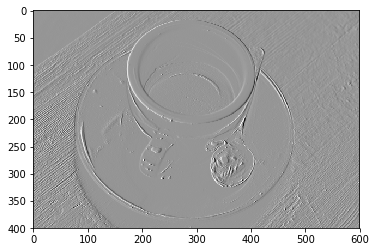

In [21]:
for i in range(coffee.shape[0]):
    for j in range(1, coffee.shape[1] - 1):
        img_fdc_x[i, j] = (coffee[i, j + 1] - coffee[i, j - 1]) / 2.0
        
img_fdc_x = normalize_f(img_fdc_x)
plt.imshow(img_fdc_x, cmap = cm.Greys_r)

### Diferencias hacia adelante, atrás y centrales en Y

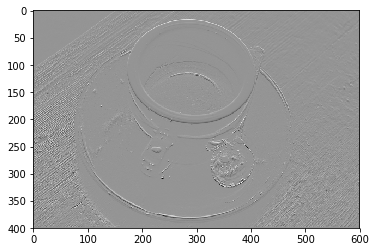

In [22]:
for i in range(coffee.shape[1]):
    for j in range(coffee.shape[0] - 1):
        img_fdf_y[j, i] = coffee[j + 1, i] - coffee[j, i]
        
img_fdf_y = normalize_f(img_fdf_y)
plt.imshow(img_fdf_y, cmap = cm.Greys_r)

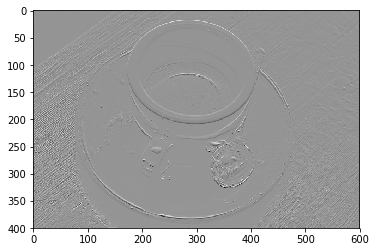

In [23]:
for i in range(coffee.shape[1]):
    for j in range(1, coffee.shape[0]):
        img_fdb_y[j, i] = coffee[j, i] - coffee[j - 1, i]
        
img_fdb_y = normalize_f(img_fdb_y)
plt.imshow(img_fdb_y, cmap = cm.Greys_r)

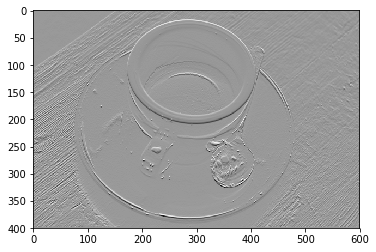

In [24]:
for i in range(coffee.shape[1]):
    for j in range(1, coffee.shape[0] - 1):
        img_fdc_y[j, i] = (coffee[j + 1, i] - coffee[j - 1, i]) / 2.0
        
img_fdc_y = normalize_f(img_fdc_y)
plt.imshow(img_fdc_y, cmap = cm.Greys_r)

### Diferencias finitas en diagonales

Diferencias hacia adelante en ambas diagonales

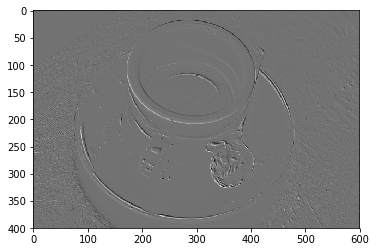

In [25]:
img_fdf_d1 = np.array(coffee, dtype = 'float')
img_fdf_d2 = np.array(coffee, dtype = 'float')

#Número de diagonales
den = math.sqrt(2)
x = 0
y = 0
sub_x = 0
sub_y = 0
while True:
    sub_x = x
    sub_y = y
    while sub_x >= 0 and sub_y < coffee.shape[0]:
        if sub_y - 1 >= 0 and sub_x + 1 < coffee.shape[1]:
            img_fdf_d1[sub_y, sub_x] = (coffee[sub_y - 1, sub_x + 1] - coffee[sub_y, sub_x]) / den
        sub_x -= 1
        sub_y += 1
    if x < coffee.shape[1] - 1:
        x += 1
    elif y < coffee.shape[0] - 1:
        y += 1
    else:
        break
    
img_fdf_d1 = normalize_f(img_fdf_d1)
plt.imshow(img_fdf_d1, cmap = cm.Greys_r)

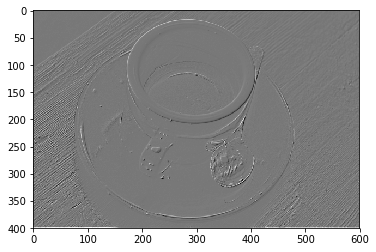

In [26]:
x = 0
y = coffee.shape[0] - 1
sub_x = 0
sub_y = 0
while True:
    sub_x = x
    sub_y = y
    while sub_x >= 0 and sub_y >= 0:
        if sub_y + 1 < coffee.shape[0] and sub_x + 1 < coffee.shape[1]:
            img_fdf_d2[sub_y, sub_x] = (coffee[sub_y + 1, sub_x + 1] - coffee[sub_y, sub_x]) / den
        sub_x -= 1
        sub_y -= 1
    if x < coffee.shape[1] - 1:
        x += 1
    elif y > 0:
        y -= 1
    else:
        break

img_fdf_d2 = normalize_f(img_fdf_d2)
plt.imshow(img_fdf_d2, cmap = cm.Greys_r)

Diferencias hacia atrás en ambas diagonales

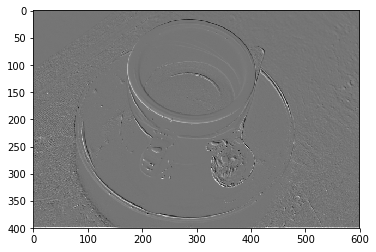

In [27]:
img_fdb_d1 = np.array(coffee, dtype = 'float')
img_fdb_d2 = np.array(coffee, dtype = 'float')

#Número de diagonales
den = math.sqrt(2)
x = 0
y = 0
sub_x = 0
sub_y = 0
while True:
    sub_x = x
    sub_y = y
    while sub_x >= 0 and sub_y < coffee.shape[0]:
        if sub_y + 1 < coffee.shape[0] and sub_x - 1 >= 0:
            img_fdb_d1[sub_y, sub_x] = (coffee[sub_y, sub_x] - coffee[sub_y + 1, sub_x - 1]) / den
        sub_x -= 1
        sub_y += 1
    if x < coffee.shape[1] - 1:
        x += 1
    elif y < coffee.shape[0] - 1:
        y += 1
    else:
        break
    
img_fdb_d1 = normalize_f(img_fdb_d1)
plt.imshow(img_fdb_d1, cmap = cm.Greys_r)

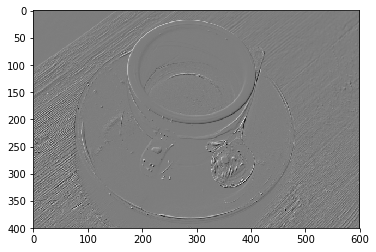

In [25]:
x = 0
y = coffee.shape[0] - 1
sub_x = 0
sub_y = 0
while True:
    sub_x = x
    sub_y = y
    while sub_x >= 0 and sub_y >= 0:
        if sub_y - 1 >= 0 and sub_x - 1 >= 0:
            img_fdb_d2[sub_y, sub_x] = (coffee[sub_y, sub_x] - coffee[sub_y - 1, sub_x - 1]) / den
        sub_x -= 1
        sub_y -= 1
    if x < coffee.shape[1] - 1:
        x += 1
    elif y > 0:
        y -= 1
    else:
        break

img_fdb_d2 = normalize_f(img_fdb_d2)
plt.imshow(img_fdb_d2, cmap = cm.Greys_r)

Diferencias centrales en ambas diagonales

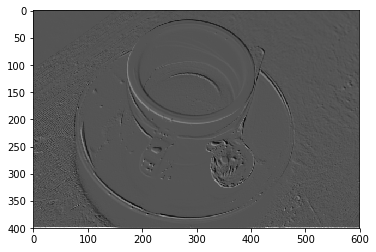

In [28]:
img_fdc_d1 = np.array(coffee, dtype = 'float')
img_fdc_d2 = np.array(coffee, dtype = 'float')

#Número de diagonales
den = 2.0 * math.sqrt(2)
x = 0
y = 0
sub_x = 0
sub_y = 0
while True:
    sub_x = x
    sub_y = y
    while sub_x >= 0 and sub_y < coffee.shape[0]:
        if sub_y + 1 < coffee.shape[0] and sub_x - 1 >= 0 and sub_y - 1 >= 0 and sub_x + 1 < coffee.shape[1]:
            img_fdc_d1[sub_y, sub_x] = (coffee[sub_y - 1, sub_x + 1] - coffee[sub_y + 1, sub_x - 1]) / den
        sub_x -= 1
        sub_y += 1
    if x < coffee.shape[1] - 1:
        x += 1
    elif y < coffee.shape[0] - 1:
        y += 1
    else:
        break
    
img_fdc_d1 = normalize_f(img_fdc_d1)
plt.imshow(img_fdc_d1, cmap = cm.Greys_r)

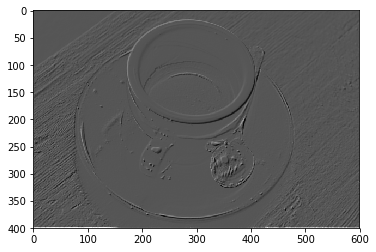

In [29]:
x = 0
y = coffee.shape[0] - 1
sub_x = 0
sub_y = 0
while True:
    sub_x = x
    sub_y = y
    while sub_x >= 0 and sub_y >= 0:
        if sub_y + 1 < coffee.shape[0] and sub_x - 1 >= 0 and sub_y - 1 >= 0 and sub_x + 1 < coffee.shape[1]:
            img_fdc_d2[sub_y, sub_x] = (coffee[sub_y + 1, sub_x + 1] - coffee[sub_y - 1, sub_x - 1]) / den
        sub_x -= 1
        sub_y -= 1
    if x < coffee.shape[1] - 1:
        x += 1
    elif y > 0:
        y -= 1
    else:
        break

img_fdc_d2 = normalize_f(img_fdc_d2)
plt.imshow(img_fdc_d2, cmap = cm.Greys_r)

### Diferencias finitas en 1D

Se calculará las diferencias finitas hacia adelante, atrás y centrales de la función seno.

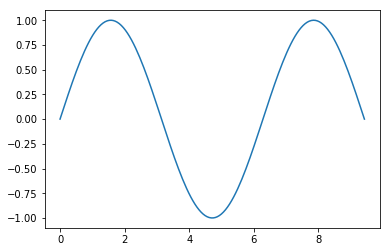

In [30]:
k = 5.0
n = 150

x = np.linspace(0, 3 * np.pi, 150)
y = np.sin(x)

plt.plot(x, y)

Diferencias hacia adelante

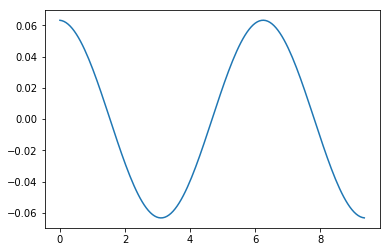

In [31]:
der = np.zeros(x.size, dtype = 'float')
for i in range(x.size - 1):
    der[i] = (y[i + 1] - y[i])
    
plt.plot(x[0:-1], der[0:-1])

Diferencias hacia atrás

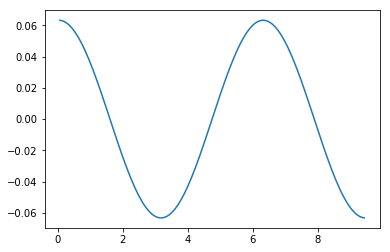

In [32]:
der = np.zeros(x.size, dtype = 'float')
for i in range(1, x.size):
    der[i] = (y[i] - y[i - 1])
    
plt.plot(x[1:], der[1:])

Diferencias centrales

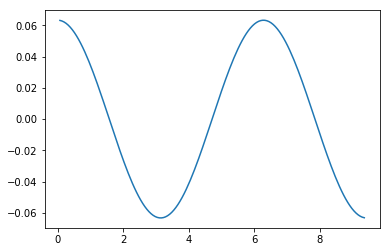

In [33]:
der = np.zeros(x.size, dtype = 'float')
for i in range(1, x.size - 1):
    der[i] = (y[i + 1] - y[i - 1]) / 2.0
    
plt.plot(x[1:-1], der[1:-1])

Ahora se calculará los valores de la función real, el coseno.

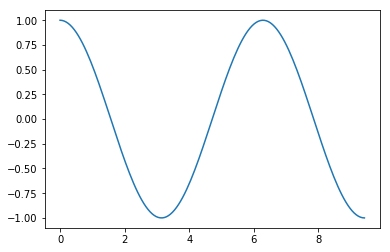

In [34]:
fx = np.cos(x)
plt.plot(x, fx)

## Contraste e intensidad de una imagen

Para esta parte se aplicará un filtro de contraste mediante una rampa y otro de intensidad gausiana a una imagen.

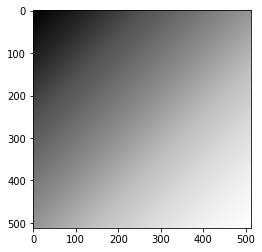

In [35]:
astronaut = rgb2gray(data.astronaut())
n = astronaut.shape[0]
contrast = np.zeros((n, n), dtype = 'float')

x = 0
y = 0
sub_x = 0
sub_y = 0
i = 0
while True:
    sub_x = x
    sub_y = y
    while sub_x >= 0 and sub_y < n:
        c = (1.0 / (2.0 * n)) * i
        contrast[sub_y, sub_x] = c
        sub_x -= 1
        sub_y += 1
    if x < n - 1:
        x += 1
        i += 1
    elif y < n - 1:
        y += 1
        i += 1
    else:
        break

plt.imshow(normalize_f(contrast), cmap = cm.Greys_r)

Crear el foco gaussiano

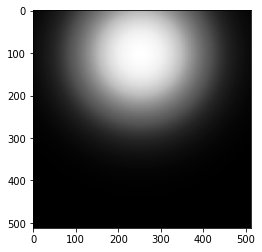

In [36]:
bright = np.zeros((n, n), dtype = 'float')
sigma = 100.0
s = 2.0 * sigma * sigma
ssum = 0.0
x0 = 250
y0 = 100

for i in range(-2, n - 3):
    for j in range(-2, n - 3):
        r = np.sqrt((i - y0) ** 2 + (j - x0) ** 2)
        bright[i + 2][j + 2] = (np.exp(-(r * r) / s)) / (np.pi * s)
        ssum += bright[i + 2][j + 2]
        
bright /= ssum
bright = normalize_f(bright)
plt.imshow(bright, cmap = cm.Greys_r)

Aplicar el contraste a la imagen original.

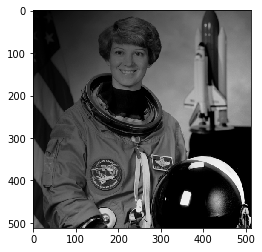

In [37]:
res = np.array(astronaut, dtype = 'float')
res = contrast * res
res = normalize_f(res)

plt.imshow(res, cmap = cm.Greys_r)

Aplicar el foco de intensidad a la .

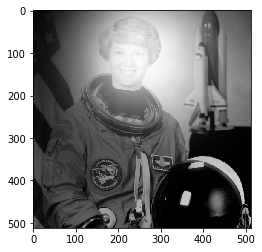

In [38]:
res += bright
res = normalize(res)

plt.imshow(res, cmap = cm.Greys_r)

## Composición

Se mostrarán diferentes niveles de composición donde se variará el $\alpha$

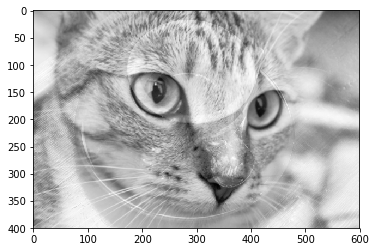

In [39]:
alpha = 0.3
cat = rgb2gray(data.chelsea())
coffee = rgb2gray(data.coffee())

#Redimensionar
cat = resize(cat, coffee.shape, mode='reflect')

res = np.array(cat, dtype = 'float')
res = (1.0 - alpha) * res
res = normalize_f(res)
res += (alpha * coffee)
res = normalize_f(res)

plt.imshow(res, cmap = cm.Greys_r)

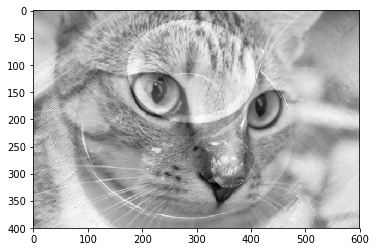

In [40]:
alpha = 0.5
cat = rgb2gray(data.chelsea())
coffee = rgb2gray(data.coffee())

#Redimensionar
cat = resize(cat, coffee.shape, mode='reflect')

res = np.array(cat, dtype = 'float')
res = (1.0 - alpha) * res
res = normalize_f(res)
res += (alpha * coffee)
res = normalize_f(res)

plt.imshow(res, cmap = cm.Greys_r)

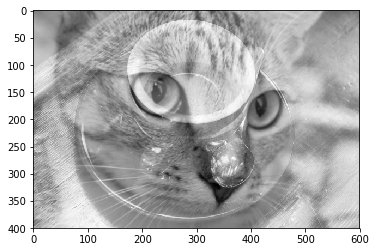

In [41]:
alpha = 0.7
cat = rgb2gray(data.chelsea())
coffee = rgb2gray(data.coffee())

#Redimensionar
cat = resize(cat, coffee.shape, mode='reflect')

res = np.array(cat, dtype = 'float')
res = (1.0 - alpha) * res
res = normalize_f(res)
res += (alpha * coffee)
res = normalize_f(res)

plt.imshow(res, cmap = cm.Greys_r)

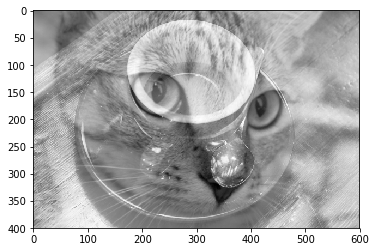

In [42]:
alpha = 0.9
cat = rgb2gray(data.chelsea())
coffee = rgb2gray(data.coffee())

#Redimensionar
cat = resize(cat, coffee.shape, mode='reflect')

res = np.array(cat, dtype = 'float')
res = (1.0 - alpha) * res
res = normalize_f(res)
res += (alpha * coffee)
res = normalize_f(res)

plt.imshow(res, cmap = cm.Greys_r)